# Assignment 2

## Part 1

In this part a prediction error method will be used to estimate the parameters of a the data generated in part 1 in exercise 1. 

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.optimize import minimize
data = pd.read_csv('/Users/loveredin/Documents/GitHub/advanced_time_series_analysis/assignment_2/data.csv', index_col = 0)
print(data.head())
X_t = np.array(data['Value'])
print(X_t)

      Value
0  0.000000
1  2.496714
2  2.361079
3  3.119904
4  4.147011
[ 0.          2.49671415  2.36107853 ... -5.18094676 -5.2957901
 -4.15212948]


In [58]:
def kernel(x, kernel_function = 'gaussian'):

    # Define different cases of kernel functions
    if kernel_function == 'gaussian':
        return np.exp(-0.5 * x ** 2) / np.sqrt(2 * np.pi)
    elif kernel_function == 'tricube':
        in_interval = np.abs(x) <= 1
        weights = np.zeros_like(x, dtype = float)
        weights[in_interval] = (1 - np.abs(x[in_interval]) ** 3) ** 3
        return weights
    else:
        return 1 / 2 * ((x >= -1) & (x <= 1)).astype(float)


In [59]:
# Algo:
# Define the loss function
# Taylor expansion of loss function, done analytically
# Evaluate the taylor expansion of order 2, in the point theta_0
# Calculate gradient and hessian, evaluated at theta_0 and theta_est
# Use the scipy function minimization, when defined the loss function, to estimate the new parameters
# Estimate new parameters based on old, equation

# Only make small adjustments, 

# The data we are working with and am trying to estimate the parameters for is a setar model, with four parameters, theta_00, theta_01, theta_10, theta, 
# Want to compute the value for all N time values of the time series


def conditional_expectation(X_t_lagged, theta, threshold = 0):
    return np.where(X_t_lagged < threshold, theta[0] + theta[1] * X_t_lagged, 2 + 0.2 * X_t_lagged[-1])
    
def loss_function(X_t, theta, conditional_expectation):
    # This function defines the lag for which, time series to use, in this case it is going to be the lagged 1 time series
    
    # Optimization is carried out for all N, the length of the entire time series
    # If the optimizartion were to be carried out for a sub-sequent of the time series, the partial time series X_t of length N, would have been investigated
    # Here N = len(X_t) - 1

    return sum((X_t[1 : ] - conditional_expectation(X_t[ : -1], theta)) ** 2)   

# Only estimate two parameters
theta_0 = np.zeros(2)

theta_hat = minimize(lambda theta: loss_function(X_t, theta, conditional_expectation), theta_0)

print(theta_hat)

print(f'The parameter estimation is {theta_hat.x}')

# optimized theta: [-2.06836669  0.48354977]
# Actual theta [-2, 0.5], fairly good estimation, only estimated two of the parameters, with the other ones fixed to make 2 feasible

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 11766.435106909581
        x: [-2.068e+00  4.835e-01]
      nit: 5
      jac: [ 1.709e-03 -4.150e-03]
 hess_inv: [[ 6.985e-04  1.645e-04]
            [ 1.645e-04  4.180e-05]]
     nfev: 123
     njev: 38
The parameter estimation is [-2.06836669  0.48354977]


## Part 2

Plotting contour curves for different values of N, for the loss

(1000, 1000)
[[132046.73229022 132114.38549972 132182.05862101 ... 209383.31216319
  209470.81744097 209558.34263055]
 [131755.73303294 131823.30818941 131890.90325769 ... 209014.49404168
  209101.92126644 209189.368403  ]
 [131465.06574932 131532.56285277 131600.07986802 ... 208646.00789383
  208733.35706556 208820.7261491 ]
 ...
 [  6747.38441806   6737.21876333   6727.0730204  ...   6498.55665611
    6508.24306967   6517.94939502]
 [  6787.36289498   6777.11918723   6766.89539128 ...   6460.71626881
    6470.32462934   6479.95290168]
 [  6827.67334557   6817.35158479   6807.04973581 ...   6423.20785517
    6432.73816268   6442.28838199]]


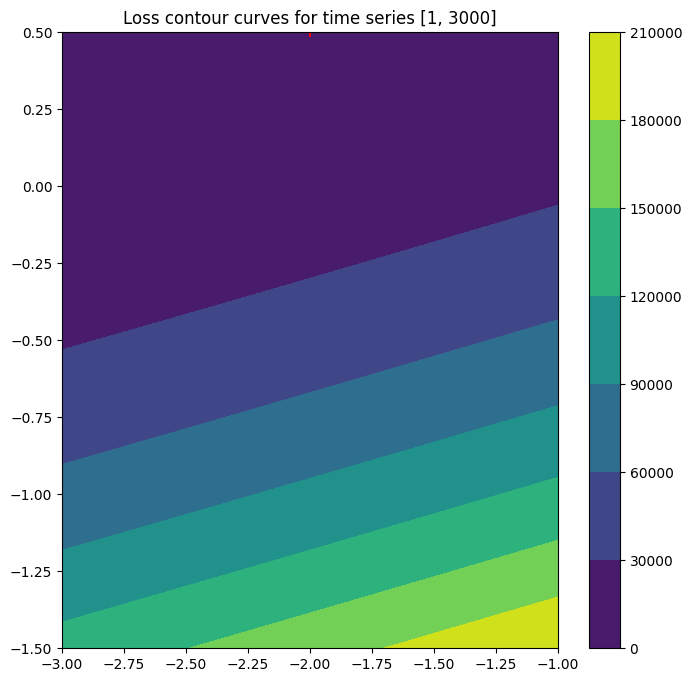

(1000, 1000)
[[2355.85766377 2356.83447311 2357.81157103 ... 3473.01672146
  3474.28124193 3475.54605098]
 [2351.87995913 2352.85564673 2353.8316229  ... 3467.92063705
  3469.18403578 3470.44772308]
 [2347.90686726 2348.88143312 2349.85628754 ... 3462.82916541
  3464.0914424  3465.35400796]
 ...
 [ 680.35610062  680.21453019  680.07324834 ...  682.49052892
   682.63666963  682.78309891]
 [ 680.97733165  680.83463947  680.69223588 ...  681.99338018
   682.13839914  682.28370668]
 [ 681.60317545  681.45936153  681.31583619 ...  681.50084422
   681.64474143  681.78892723]]


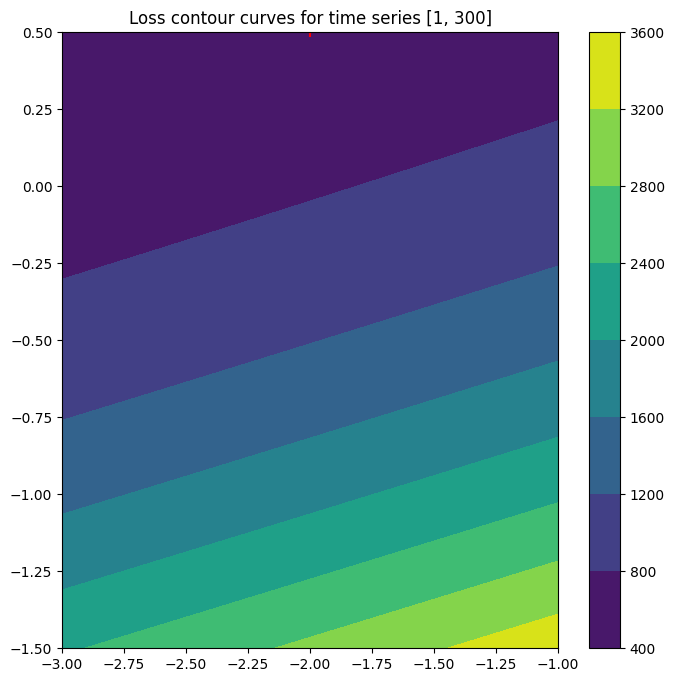

(1000, 1000)
[[27.30610116 27.30610116 27.30610116 ... 27.30610116 27.30610116
  27.30610116]
 [27.30610116 27.30610116 27.30610116 ... 27.30610116 27.30610116
  27.30610116]
 [27.30610116 27.30610116 27.30610116 ... 27.30610116 27.30610116
  27.30610116]
 ...
 [27.30610116 27.30610116 27.30610116 ... 27.30610116 27.30610116
  27.30610116]
 [27.30610116 27.30610116 27.30610116 ... 27.30610116 27.30610116
  27.30610116]
 [27.30610116 27.30610116 27.30610116 ... 27.30610116 27.30610116
  27.30610116]]


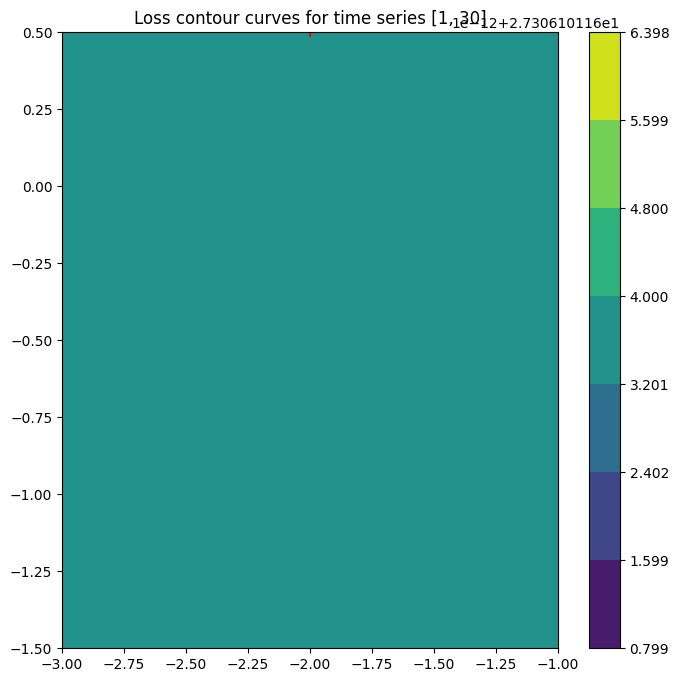

(1000, 1000)
[[14358.16897974 14365.90945539 14373.65231981 ... 23261.46439872
  23271.5864832  23281.71095646]
 [14325.7441626  14333.47557831 14341.20938279 ... 23220.00682402
  23230.11984856 23240.23526188]
 [14293.35686492 14301.07922069 14308.80396524 ... 23178.58676877
  23188.69073338 23198.79708676]
 ...
 [  659.26279295   657.97051103   656.68061789 ...   556.89892047
    557.98824739   559.07996308]
 [  664.24487641   662.94353456   661.64458148 ...   552.84824637
    553.92851335   555.01116911]
 [  669.26447934   667.95407755   666.64606453 ...   548.83509173
    549.90629878   550.97989459]]


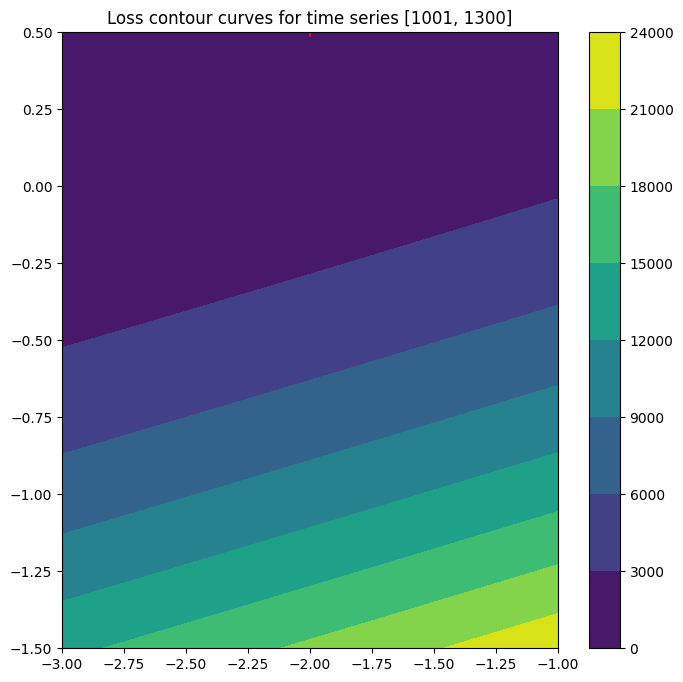

(1000, 1000)
[[ 715.49822281  716.02461273  716.55122709 ... 1351.74908122
  1352.49924647 1353.24963616]
 [ 713.71607617  714.24177784  714.76770396 ... 1349.28075352
  1350.03023052 1350.77993196]
 [ 711.93621889  712.46123231  712.98647018 ... 1346.81471517
  1347.56350392 1348.31251712]
 ...
 [  75.37801695   75.2182258    75.0586591  ...   27.50635732
    27.57034151   27.63455013]
 [  75.87836026   75.71788087   75.55762592 ...   27.32051957
    27.38381551   27.44733589]
 [  76.38099293   76.21982529   76.0588821  ...   27.13697118
    27.19957887   27.26241101]]


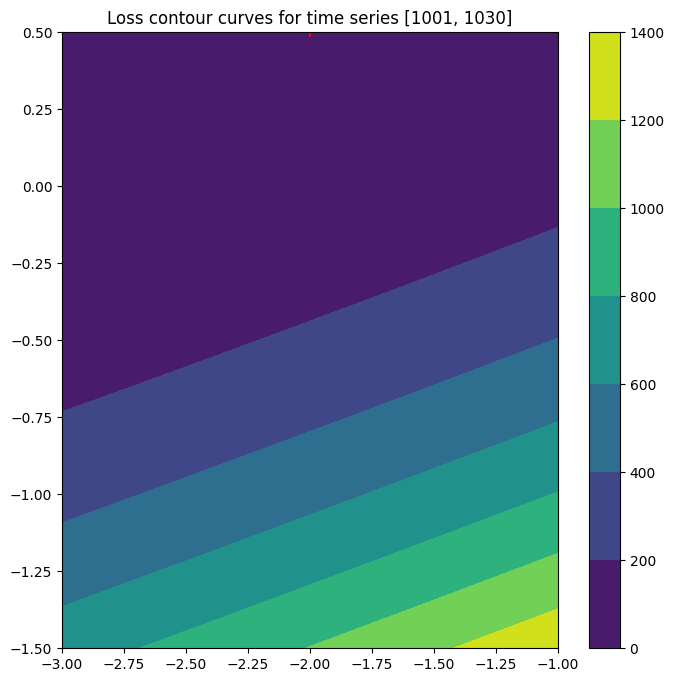

In [60]:
theta_3, theta_4 = 2, 0.2
# Actual theta_1, theta_2 = [-2, 0.5]
theta_asterisk = [[theta_hat.x[0],  theta_hat.x[1]],  [theta_3, theta_4]]

def model(X_t_1, theta_asterisk):
    if X_t_1 < 0:
        return theta_asterisk[0][0] + theta_asterisk[0][1] * X_t_1
    else: 
        return theta_asterisk[1][0] + theta_asterisk[1][1] * X_t_1
    

# In this part, it is desired to create a 3d contour plot of the N, and the lag??
# The following contour curves function will be used
# plt.contour([X, Y, ], Z)

def plot_contour(X_t_subset, p1_range, p2_range, loss_function, range_idx ,estimation_function = conditional_expectation):
    # In this, we want in an interval to plot the contours as a function of p1 and p2, for different lengths of the time series
    # We expect to see a lot of lines, decreases around the actual parameters, plot an 'x' around actual parameters
    
    # Determine the loss matrix
    # local_loss_matrix = np.array([[loss_function(X_t_subset, [p1, p2], estimation_function) for p2 in p2_range] for p1 in p1_range])
    local_loss_matrix = np.array([[loss_function(X_t_subset, [p1, p2], estimation_function) for p1 in p1_range] for p2 in p2_range])
    print(local_loss_matrix.shape)
    print(local_loss_matrix)
    plt.figure(figsize = (8, 8))
    P1_RANGE, P2_RANGE = np.meshgrid(p1_range, p2_range)
    # plt.contour([p1_range, p2_range], local_loss_matrix)
    # plt.contour([P1_RANGE, P2_RANGE], local_loss_matrix)
    plt.contourf(P1_RANGE, P2_RANGE, local_loss_matrix)
    plt.colorbar()
    plt.scatter([-2], [0.5], marker = '+', color = 'red', s = 50)
    plt.title(f'Loss contour curves for time series [{range_idx[0]}, {range_idx[1]}]')
    plt.show()

# Defining parameters
def main():
    nr_points = 1000
    p1_range, p2_range = np.linspace(-3, -1, nr_points), np.linspace(- 3 / 2, 1 / 2, nr_points)
    
    starts, stops = [1, 1, 1, 1001, 1001], [3000, 300, 30, 1300, 1030]
    for interval_index, _ in enumerate(starts):
        plot_contour(X_t[starts[interval_index] : stops[interval_index]], p1_range, p2_range, loss_function, [starts[interval_index], stops[interval_index]])

main()



## Part 3

In this part, a doubly stochastic model will be simulated. The following AR(1)-AR(1) will be simulated.

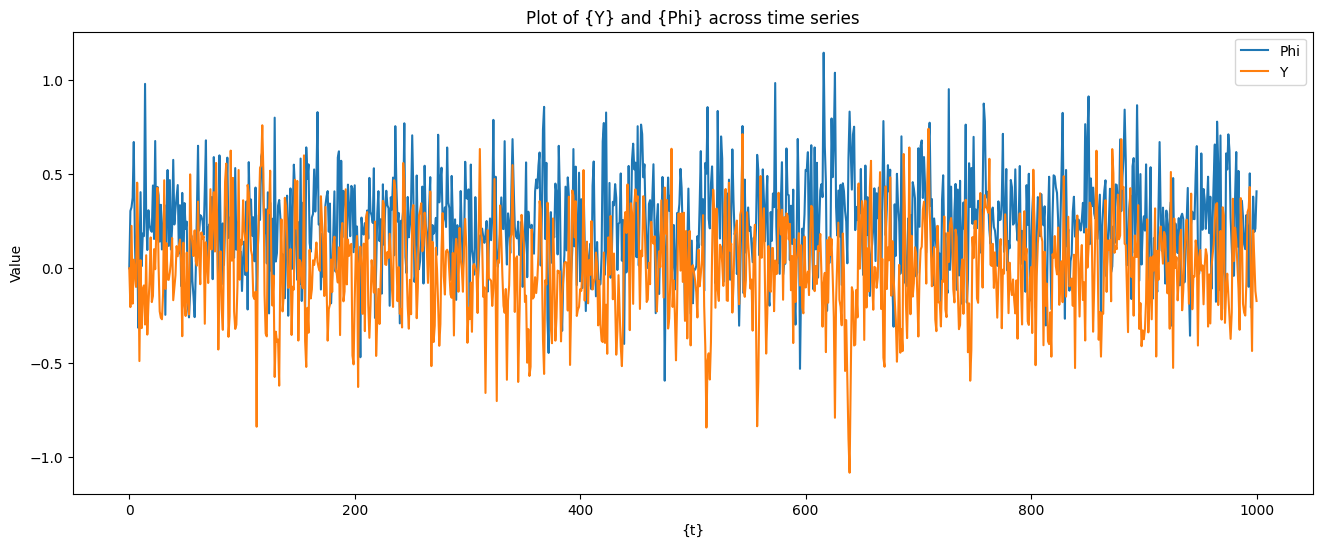

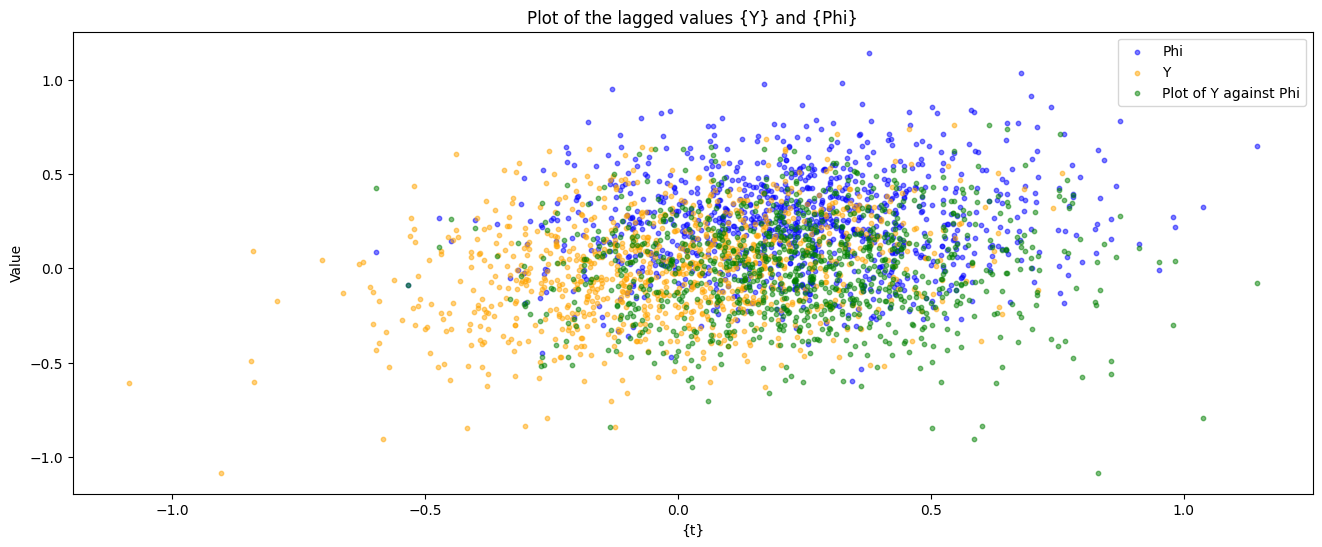

In [74]:
def doubly_stochastic(phi, mu, sigma_epsilon, sigma_zeta, nr_points = 1000): # , p1 = 1, p2 = 1): # Make adjustable with degree of AR model
    Phi, Y = [0], [0] # Initial values of the process
    for data in range(nr_points):
        epsilon_t = np.random.normal(0, sigma_epsilon ** 2)
        zeta_t = np.random.normal(0, sigma_zeta ** 2)
        Phi_t = mu + phi * (Phi[-1] - mu) + zeta_t
        Y_t = Phi_t * Y[-1] + epsilon_t
        Phi.append(Phi_t)
        Y.append(Y_t)
    return Phi, Y


def plot_doubly_stochastic(phi = 1 / 8, 
                        mu = 1 / 4, 
                        sigma_epsilon = 1 / 2, 
                        sigma_zeta = 1 / 2, 
                        nr_points = 1000):
    
    Phi, Y = doubly_stochastic(phi, mu, sigma_epsilon, sigma_zeta, nr_points)
    plt.figure(figsize = (16, 6))
    plt.plot(np.arange(nr_points + 1), Phi, label = 'Phi')
    plt.plot(np.arange(nr_points + 1), Y, label = 'Y')
    plt.legend()
    plt.title(rf'Plot of {{Y}} and {{Phi}} across time series')
    plt.xlabel(rf'{{t}}')
    plt.ylabel('Value')
    plt.show()

    # Plot the increments
    plt.figure(figsize = (16, 6))
    plt.scatter(Phi[ : -1], Phi[1 : ], label = 'Phi', color = 'blue', s = 10, alpha = 1 / 2)
    plt.scatter(Y[ : -1], Y[1 : ], label = 'Y', color = 'orange', s = 10, alpha = 1 / 2)
    plt.scatter(Phi, Y, label = 'Plot of Y against Phi', color = 'green', s = 10, alpha = 1 / 2)
    plt.legend()
    plt.title(rf'Plot of the lagged values {{Y}} and {{Phi}}')
    plt.xlabel(rf'{{t}}')
    plt.ylabel('Value')
    plt.show()


plot_doubly_stochastic()